In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import re
import os

dimension = "64"
#path = "TODO replace with path to results folder"
file_paths = {"Elastic-GCN": "save_results_tuning_"+dimension+"_gcn_baseline_masking_weights_elastic_nullingout.pkl",
              "MAE-GCN": "save_results_tuning_"+dimension+"_gcn_baseline_masking_mae_weights_elastic_nullingout.pkl",
              "VAE-GCN": "save_results_tuning_"+dimension+"_gcn_baseline_masking_vae_weights_elastic_nullingout.pkl",
              "SPAREF-MAE-GCN": "save_results_tuning_"+dimension+"_sparef_gcn_baseline_masking_mae_weights_elastic_nullingout.pkl",
              "SPAREF-VAE-GCN": "save_results_tuning_"+dimension+"_sparef_gcn_baseline_masking_vae_weights_elastic_nullingout.pkl"
              }

full_paths = {k: os.path.join(path, v) for k, v in file_paths.items()}

In [3]:
# Creating DataFrame with appropriate column names
columns = ['MLP_layers', 'GNN_layers', 'num_head', 'hidden_dim', 'dropout', 'loss_lambda', 'weights_lambda', 'weights_elastic']
additional_columns = ['Perc0_AvgAcc', 'Perc0_StdAcc', 'Perc0_AvgAUC', 'Perc0_StdAUC',
                      'Perc07_AvgAcc', 'Perc07_StdAcc', 'Perc07_AvgAUC', 'Perc07_StdAUC',
                      'Perc08_AvgAcc', 'Perc08_StdAcc', 'Perc08_AvgAUC', 'Perc08_StdAUC',
                      'Perc095_AvgAcc', 'Perc095_StdAcc', 'Perc095_AvgAUC', 'Perc095_StdAUC',
                      'Perc09_AvgAcc', 'Perc09_StdAcc', 'Perc09_AvgAUC', 'Perc09_StdAUC',
                      'Perc098_AvgAcc', 'Perc098_StdAcc', 'Perc098_AvgAUC', 'Perc098_StdAUC',
                      'Perc099_AvgAcc', 'Perc099_StdAcc', 'Perc099_AvgAUC', 'Perc099_StdAUC',
                      'MaxAvgAcc', 'MaxAvgAUC',
                      'Perc0_TreatmentAcc', 'Perc0_TreatmentAUC', 'Perc0_ScannerAcc', 'Perc0_ScannerAUC',
                      'Perc07_TreatmentAcc', 'Perc07_TreatmentAUC', 'Perc07_ScannerAcc', 'Perc07_ScannerAUC',
                      'Perc08_TreatmentAcc', 'Perc08_TreatmentAUC', 'Perc08_ScannerAcc', 'Perc08_ScannerAUC',
                      'Perc095_TreatmentAcc', 'Perc095_TreatmentAUC', 'Perc095_ScannerAcc', 'Perc095_ScannerAUC',
                      'Perc09_TreatmentAcc', 'Perc09_TreatmentAUC', 'Perc09_ScannerAcc', 'Perc09_ScannerAUC',
                      'Perc098_TreatmentAcc', 'Perc098_TreatmentAUC', 'Perc098_ScannerAcc', 'Perc098_ScannerAUC',
                      'Perc099_TreatmentAcc', 'Perc099_TreatmentAUC', 'Perc099_ScannerAcc', 'Perc099_ScannerAUC']
additional_columns_old = ['Perc0_AvgAcc', 'Perc0_StdAcc', 'Perc0_AvgAUC', 'Perc0_StdAUC',
                      'Perc07_AvgAcc', 'Perc07_StdAcc', 'Perc07_AvgAUC', 'Perc07_StdAUC',
                      'Perc08_AvgAcc', 'Perc08_StdAcc', 'Perc08_AvgAUC', 'Perc08_StdAUC',
                      'Perc095_AvgAcc', 'Perc095_StdAcc', 'Perc095_AvgAUC', 'Perc095_StdAUC',
                      'Perc09_AvgAcc', 'Perc09_StdAcc', 'Perc09_AvgAUC', 'Perc09_StdAUC',
                      'Perc098_AvgAcc', 'Perc098_StdAcc', 'Perc098_AvgAUC', 'Perc098_StdAUC',
                      'Perc099_AvgAcc', 'Perc099_StdAcc', 'Perc099_AvgAUC', 'Perc099_StdAUC',
                      'MaxAvgAcc', 'MaxAvgAUC',
                      'Perc0_TreatmentAcc', 'Perc0_TreatmentAUC', 'Perc0_ScannerAcc', 'Perc0_ScannerAUC',
                      'Perc07_TreatmentAcc', 'Perc07_TreatmentAUC', 'Perc07_ScannerAcc', 'Perc07_ScannerAUC',
                      'Perc08_TreatmentAcc', 'Perc08_TreatmentAUC', 'Perc08_ScannerAcc', 'Perc08_ScannerAUC',
                      'Perc095_TreatmentAcc', 'Perc095_TreatmentAUC', 'Perc095_ScannerAcc', 'Perc095_ScannerAUC',
                      'Perc09_TreatmentAcc', 'Perc09_TreatmentAUC', 'Perc09_ScannerAcc', 'Perc09_ScannerAUC',
                      'Perc098_TreatmentAcc', 'Perc098_TreatmentAUC', 'Perc098_ScannerAcc', 'Perc098_ScannerAUC',
                      'Perc099_TreatmentAcc', 'Perc099_TreatmentAUC', 'Perc099_ScannerAcc', 'Perc099_ScannerAUC',
                      'Sim_Masks_0,1', 'Sim_Masks_0,2', 'Sim_Masks_0,3', 'Sim_Masks_0,4',
                      'Sim_Masks_1,0', 'Sim_Masks_1,2', 'Sim_Masks_1,3', 'Sim_Masks_1,4',
                      'Sim_Masks_2,0', 'Sim_Masks_2,1', 'Sim_Masks_2,3', 'Sim_Masks_2,4',
                      'Sim_Masks_3,0', 'Sim_Masks_3,1', 'Sim_Masks_3,2', 'Sim_Masks_3,4',
                      'Sim_Masks_4,0', 'Sim_Masks_4,1', 'Sim_Masks_4,2', 'Sim_Masks_4,3']
columns_new = columns + additional_columns
columns_old = columns + additional_columns_old

def extract_numbers(s):
    return [float(n) for n in re.findall(r"[-+]?\d*\.\d+|\d+", s)]


# Process the data
def format_data(results):
    formatted_data = []
    for key, values in results.items():
        row = list(key)
        for value in values:
            for perc in ['perc 0.7', 'perc 0.8', 'perc 0.95', 'perc 0.98', 'perc 0.99', 'perc 0.9','perc 0']:
                value = value.replace(perc, "")
            # get rid of combinations from 0 to 4 of (0, 1), ...
            for i in range(5):
                for j in range(5):
                    value = value.replace(f"({i}, {j})", "")
            numbers = extract_numbers(value)
            row.extend(numbers)
        formatted_data.append(row)

    try:
        df = pd.DataFrame(formatted_data, columns=columns_new)
    except:
        df = pd.DataFrame(formatted_data, columns=columns_old)
    # Display the DataFrame
    df.sort_values(by='Perc0_AvgAcc', ascending=False)
    return df

In [4]:
# Load dataframes
k = "SpaRef"
dfs = []
percentages = ['Perc0', 'Perc07', 'Perc08', 'Perc09', 'Perc095', 'Perc098', 'Perc099']
for key, full_path in full_paths.items():
    with open(full_path, 'rb') as f:
        results = pkl.load(f)
        df = format_data(results)
        df['Method'] = key
        dfs.append(df)
df = pd.concat(dfs)

# Keep only the accuracy columns AvgAcc, TreatmentAcc and ScannerAcc columns, besides Method and Sim_Masks
df = df.filter(regex='AvgAcc|StdAcc|TreatmentAcc|ScannerAcc|Method')
old_columns = [p + '_AvgAcc' for p in percentages] + [p + '_StdAcc' for p in percentages] + [p + '_TreatmentAcc' for p in percentages] + [p + '_ScannerAcc' for p in percentages]
df = df.melt(id_vars=['Method'], value_vars=old_columns, var_name='Percentage-Dataset', value_name='Accuracy')
df['Zeros'] = df['Percentage-Dataset'].str.split('_').str[0]
df['Data'] = df['Percentage-Dataset'].str.split('_').str[1]
df = df.drop('Percentage-Dataset', axis=1)
df['Zeros'] = df['Zeros'].replace({'Perc0': 0, 'Perc07': 70, 'Perc08': 80, 'Perc09': 90, 'Perc095': 95, 'Perc098': 98, 'Perc099': 99})
df['Data'] = df['Data'].replace({'AvgAcc': 'ID', 'ScannerAcc': 'OOD Site', 'TreatmentAcc': 'OOD ASD'})

# Turn the accuracy into a percentage, it already is for AvgAcc
df.loc[df['Data'].isin(['OOD Site', 'OOD ASD']), 'Accuracy'] *= 100

df

,Method,Accuracy,Zeros,Data
0,Elastic-GCN,69.630000,0,ID
1,MAE-GCN,76.170000,0,ID
2,VAE-GCN,73.720000,0,ID
3,SPAREF-MAE-GCN,73.150000,0,ID
4,SPAREF-VAE-GCN,76.160000,0,ID
...,...,...,...,...
135,Elastic-GCN,85.167464,99,OOD Site
136,MAE-GCN,71.770335,99,OOD Site
137,VAE-GCN,14.832536,99,OOD Site
138,SPAREF-MAE-GCN,85.167464,99,OOD Site


In [5]:
# Build table with the best hyperparameter settings
rows = []
for method in df['Method'].unique():
    print(method)
    # Search for the highest ID accuracy
    df_method = df[df['Method'] == method]
    df_method_id = df_method[(df_method['Data'] == 'ID')]
    best_threshold = df_method_id.sort_values('Accuracy', ascending=False).head(1)['Zeros'].values[0]
    df_method = df_method[df_method['Zeros'] == best_threshold]
    id_accuracy = df_method[df_method['Data'] == 'ID']['Accuracy'].values[0]
    ood_scanner_accuracy = df_method[df_method['Data'] == 'OOD Site']['Accuracy'].values[0]
    ood_asd_accuray = df_method[df_method['Data'] == 'OOD ASD']['Accuracy'].values[0]
    id_accuracy_std = df_method[df_method['Data'] == 'ID']['Accuracy'].values[0]
    rows.append([method, id_accuracy, ood_scanner_accuracy, ood_asd_accuray, best_threshold])

best_hyperparameters = pd.DataFrame(rows, columns=['Method', 'ID Accuracy', 'OOD Site Accuracy', 'OOD ASD Accuracy', 'Best % zeros'])
best_hyperparameters

Elastic-GCN
MAE-GCN
VAE-GCN
SPAREF-MAE-GCN
SPAREF-VAE-GCN


,Method,ID Accuracy,OOD Site Accuracy,OOD ASD Accuracy,Best % zeros
0,Elastic-GCN,73.98,68.899522,68.892794,90
1,MAE-GCN,76.17,71.770335,88.049209,0
2,VAE-GCN,82.40,14.832536,17.398946,99
3,SPAREF-MAE-GCN,74.55,83.732057,81.370826,70
4,SPAREF-VAE-GCN,82.40,85.167464,82.601054,99


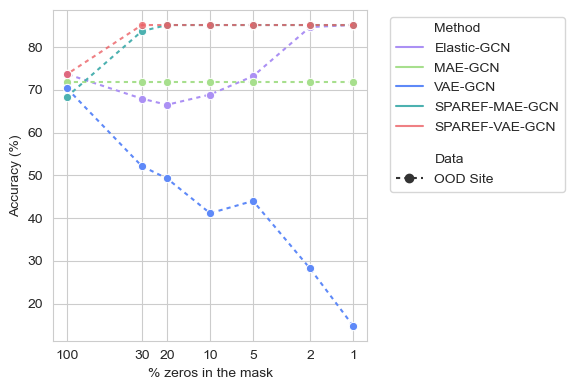

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

metric = 'Accuracy'  # The metric to plot

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# To be able to use a logarithmic scale
df['Correlations used (%)'] = df['Zeros'].replace({0: 100, 70: 30, 80: 20, 90: 10, 95: 5, 98: 2, 99: 1})

# Remove the StdAcc rows
df_plot = df[df['Data'] != 'OOD ASD']
df_plot = df_plot[df_plot['Data'] != 'StdAcc']
#df_plot = df_plot[df_plot['Data'] != 'OOD Site']
df_plot = df_plot[df_plot['Data'] != 'ID']

cp = {'red': (0.922, 0.376, 0.396, 0.8),
      'lilac': (0.671, 0.565, 0.957, 1),
      'blue': (0.369, 0.537, 0.973, 1),
      'mint' : (0.298, 0.694, 0.69, 1),
      'green': (0.655, 0.875, 0.553, 1),
      'orange': (0.996, 0.533, 0.333, 1),
      }

colors = {'Elastic-GCN': cp['lilac'], 'MAE-GCN': cp['green'], 'SPAREF-VAE-GCN': cp['red'], 'SPAREF-MAE-GCN': cp['mint'], 'VAE-GCN': cp['blue']}
#colors = {'Mask-GNN': cp['red'], 'LASSO': cp['blue'], 'ElasticNet': cp['green'], 'xGW-GAT': cp['orange'], 'SpaRef': cp['lilac']}
line_styles = {'ID': "--", 'OOD Site': (2, 2)}
#sns_plot = sns.lineplot(data=plotting_df, x='Epoch', y=metric, hue='Method', style='Dataset', dashes=line_styles)

sns.lineplot(data=df_plot, x='Correlations used (%)', y=metric, hue='Method', style='Data', dashes=line_styles, palette=colors, markers=True)    
#sns.scatterplot(data=df, x='Threshold', y=metric, hue='Method', palette=colors, markers=True)

#sns.lineplot(data=df, x='Threshold', y='B.Acc', hue='Method', style='Dataset')
ax = plt.gca()

plt.xlabel('% zeros in the mask')
plt.ylabel(metric + ' (%)')

# Place the legend outside the top right corner of the plot
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from one of the subplots
labels = ['\n' + label if label in ['Data'] else label for label in labels]
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1))



#plt.xscale('log')
ax.set_xscale('log')

# Define static tick marks
ax.set_xticks([100, 30, 20, 10, 5, 2, 1])
ax.invert_xaxis()

ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Adjust figure size and layout
plt.gcf().set_size_inches(8, 4)  # Set the figure size (width, height in inches)
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the padding of the figure. rect=[left, bottom, right, top] in normalized figure coordinates.

#plt.show()

#output_file = os.path.join(results_path, f"multiple_thresholds_{metric}.svg")
#plt.savefig(output_file, bbox_inches='tight')